In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix  
%matplotlib inline
sns.set_style('whitegrid')

### Importing data

In [265]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [266]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [267]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Counting who survived and who did not

[Text(0, 0, '549'), Text(0, 0, '342')]

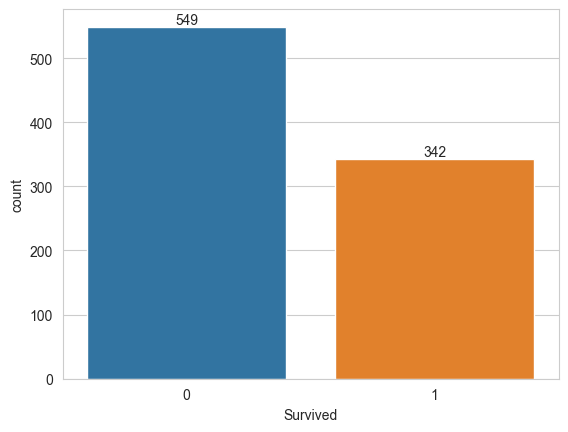

In [268]:
pl = sns.countplot(x='Survived',data=train)
pl.bar_label(pl.containers[0])

### Analising survivors sex distribution

[Text(0, 0, '81'), Text(0, 0, '233')]

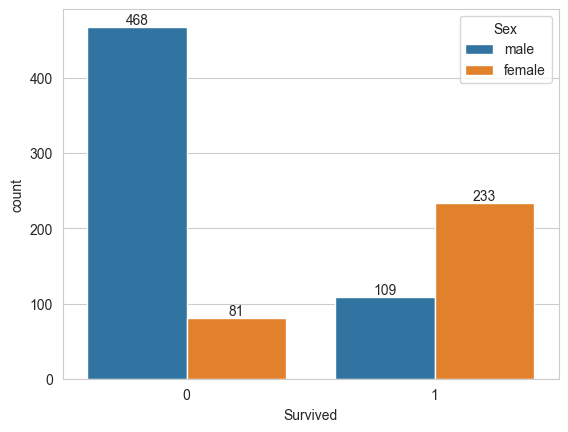

In [269]:
pl = sns.countplot(x='Survived',data=train,hue='Sex')
pl.bar_label(pl.containers[0])
pl.bar_label(pl.containers[1])

### Analising survivors class distribution

[Text(0, 0, '216'), Text(0, 0, '184'), Text(0, 0, '491')]

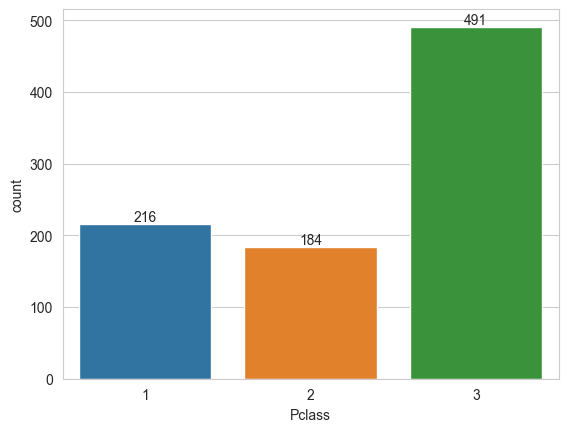

In [270]:
pl = sns.countplot(x='Pclass',data=train)
pl.bar_label(pl.containers[0])

[Text(0, 0, '372'), Text(0, 0, '119')]

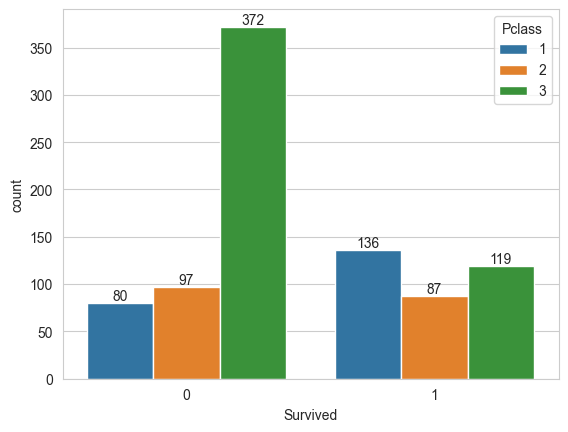

In [271]:
pl = sns.countplot(x='Survived',data=train,hue='Pclass')
pl.bar_label(pl.containers[0])
pl.bar_label(pl.containers[1])
pl.bar_label(pl.containers[2])

### Analising survivors age distribution

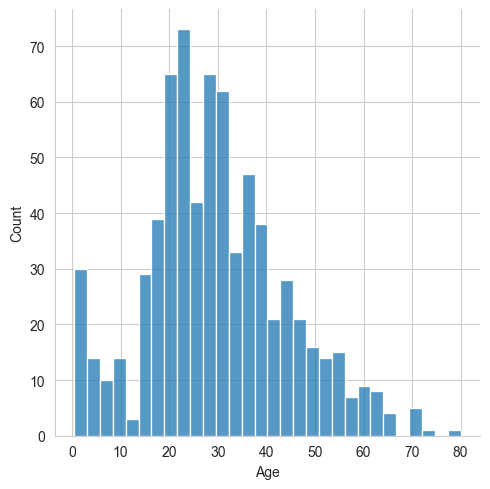

In [272]:
sns.displot(train['Age'].dropna(),bins=30)

### Checking null values on the Data Frame

<Axes: >

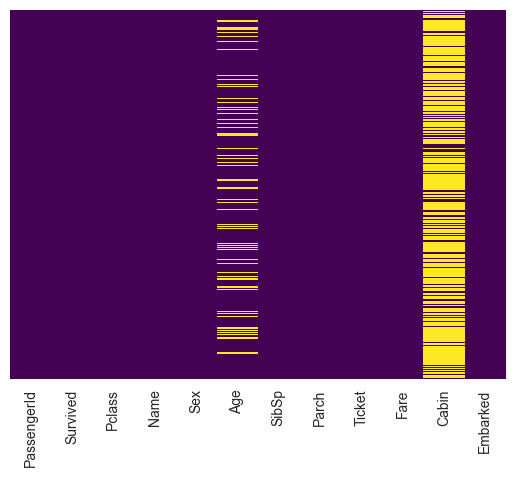

In [273]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Filling missing age with average age for passenger class 

In [274]:
train.groupby(['Pclass'])['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

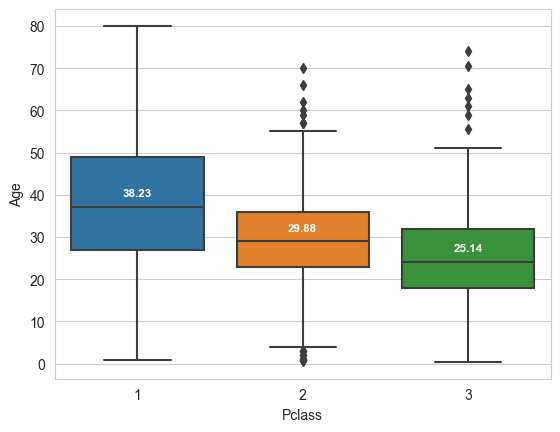

In [275]:
ax = sns.boxplot(data=train, x='Pclass',y='Age')

mean = train.groupby(['Pclass'])['Age'].mean()
vert = train['Age'].mean() * 0.05 
cat = ax.get_xticks()

for x in range(1,len(cat)+1):
    ax.text((x-1),mean[x] + vert,np.round(mean[x],2),
            horizontalalignment='center',size='small',color='w',weight='semibold')

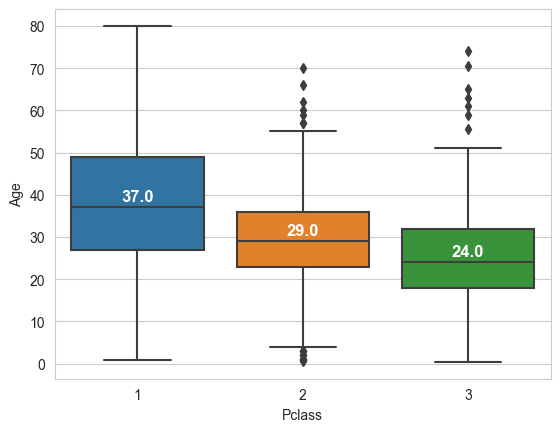

In [276]:
ax = sns.boxplot(data=train, x='Pclass',y='Age')

med = train.groupby(['Pclass'])['Age'].median()
vert = train['Age'].median() * 0.05 
cat = ax.get_xticks()

for x in range(1,(len(cat)+1)):
    ax.text((x-1),med[x] + vert,med[x], 
            horizontalalignment='center',size='large',color='w',weight='semibold')

### Creating a function that fills null ages values using the class median age

In [277]:
def in_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [278]:
train['Age'] = train[['Age','Pclass']].apply(in_age,axis=1)

### Creating dummy variables

In [279]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [280]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [281]:
train = pd.concat([train,sex,embark],axis=1)

### Dropping columns

In [282]:
train.drop(['Name','Sex','Ticket','Embarked','PassengerId','Cabin'],axis=1,inplace=True)

In [283]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


### Splitting in train and test

In [284]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Logistic Regression

In [307]:
logm = LogisticRegression(max_iter=900)

In [308]:
logm.fit(X_train,y_train) 

LogisticRegression(max_iter=900)

In [309]:
pred = logm.predict(X_test)

### Classification report

In [310]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



### Confuision matrix

In [311]:
confusion_matrix(y_test,pred)

array([[134,  20],
       [ 38,  76]])